# <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRABIES</p>

In [187]:
import pandas as pd
import numpy as  np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [188]:
df= pd.read_csv(r"C:\Users\91999\Downloads\archive (7)\IRIS.csv")

In [189]:
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [190]:
df.tail(15)

,sepal_length,sepal_width,petal_length,petal_width,species
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


In [191]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [192]:
df.shape

(150, 5)

In [193]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [194]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

#  <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</P>

In [195]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> DATA VISUALIZATION</P>

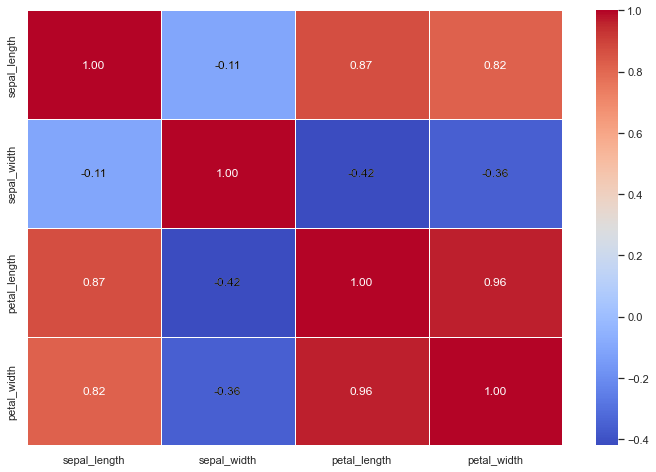

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt  

sns.set(style="white")
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
 
threshold = 0.6
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j and abs(correlation_matrix.iloc[i, j]) < threshold:
            text = plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                            ha="center", va="center", color="black")

plt.show()

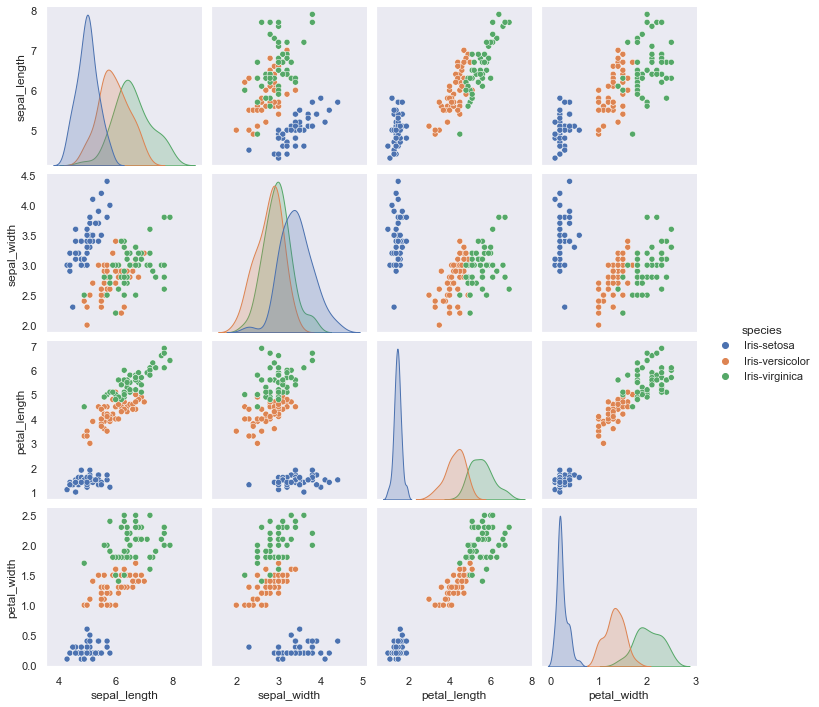

In [197]:
sns.set(style="dark")

sns.pairplot(df, hue="species")
plt.show()

In [198]:
x=df.iloc[:,:-4].values
y=df.iloc[:,-4].values
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

#  <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TRAIN_TEST_SPLIT</p>

In [199]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [200]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
10,5.4,3.7,1.5,0.2
44,5.1,3.8,1.9,0.4
32,5.2,4.1,1.5,0.1
146,6.3,2.5,5.0,1.9
149,5.9,3.0,5.1,1.8
...,...,...,...,...
120,6.9,3.2,5.7,2.3
101,5.8,2.7,5.1,1.9
31,5.4,3.4,1.5,0.4
123,6.3,2.7,4.9,1.8


In [201]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
109,7.2,3.6,6.1,2.5
6,4.6,3.4,1.4,0.3
54,6.5,2.8,4.6,1.5
75,6.6,3.0,4.4,1.4
148,6.2,3.4,5.4,2.3
18,5.7,3.8,1.7,0.3
135,7.7,3.0,6.1,2.3
4,5.0,3.6,1.4,0.2
78,6.0,2.9,4.5,1.5
127,6.1,3.0,4.9,1.8


In [202]:
y_train

10        Iris-setosa
44        Iris-setosa
32        Iris-setosa
146    Iris-virginica
149    Iris-virginica
            ...      
120    Iris-virginica
101    Iris-virginica
31        Iris-setosa
123    Iris-virginica
11        Iris-setosa
Name: species, Length: 120, dtype: object

In [203]:
y_test

109     Iris-virginica
6          Iris-setosa
54     Iris-versicolor
75     Iris-versicolor
148     Iris-virginica
18         Iris-setosa
135     Iris-virginica
4          Iris-setosa
78     Iris-versicolor
127     Iris-virginica
37         Iris-setosa
81     Iris-versicolor
140     Iris-virginica
86     Iris-versicolor
87     Iris-versicolor
52     Iris-versicolor
53     Iris-versicolor
62     Iris-versicolor
25         Iris-setosa
20         Iris-setosa
73     Iris-versicolor
45         Iris-setosa
13         Iris-setosa
59     Iris-versicolor
63     Iris-versicolor
19         Iris-setosa
1          Iris-setosa
113     Iris-virginica
102     Iris-virginica
64     Iris-versicolor
Name: species, dtype: object

#  <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOGISTIC REGRESSION </p>

In [204]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_logreg = model1.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", accuracy_logreg)

Accuracy (Logistic Regression):  100.0


#  <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">K-NEIGHBORS CLASSIFIER</p>

In [205]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
accuracy_knn = model2.score(x_test, y_test) * 100
print("Accuracy (KNN): ", accuracy_knn)

Accuracy (KNN):  100.0


#  <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DECISION TREE CLASSIFIER</p>

In [206]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
accuracy_decision_tree = model3.score(x_test, y_test) * 100
print("Accuracy (Decision Tree): ", accuracy_decision_tree)

Accuracy (Decision Tree):  100.0


# <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATION SCORE</p>

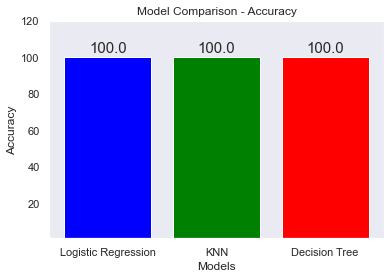

In [207]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logreg,  accuracy_knn,  accuracy_decision_tree]

plt.bar(models, accuracies, color=['blue', 'green', 'Red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([1, 120])

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=15)

plt.show()

# <p style="background-color:#f56c0a;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>